In [1]:
%%time
import sys
sys.path.insert(0, r'G:\PythonProjects\WineRecognition2')
import sklearn_crfsuite
import eli5
from sklearn.model_selection import train_test_split
from features import features
from data_master import DataGenerator, DataLoader
from mlflow_utils import log_mlflow_on_train

Wall time: 2.98 s


In [2]:
%%time
TRAIN_DATASET_PATH = r"G:\PythonProjects\WineRecognition2\data\text\Halliday_Wine_AU-only_completed_rows-all_keys.txt"
DICTIONARY_PATH = r"G:\PythonProjects\WineRecognition2\data\dictionaries\Dict-byword_Halliday_Winesearcher_Wine_AU-only_completed_rows"
MODEL_NAME = "CRF_test"
ALGORITHM = 'lbfgs'
C1 = 0.1
C2 = 0.1
MAX_ITERATIONS = 5
ALL_POSSIBLE_TRANSITIONS = True
TEST_SIZE = 0.2
RUN_NAME = 'test_run_train_model'
OUTPUT_DIR = ''
START_TIME = ''

Wall time: 0 ns


In [3]:
%%time
with open(TRAIN_DATASET_PATH, encoding='utf-8') as file:
    sents = DataGenerator.generate_sents(
        file.read().split('\n')
    )

Wall time: 1.42 s


In [4]:
%%time
train_sents, val_sents = train_test_split(sents, test_size=TEST_SIZE)

Wall time: 32 ms


In [5]:
%%time
freq_dict = DataLoader.load_frequency_dictionary(DICTIONARY_PATH, to_lowercase=True)

Wall time: 47 ms


In [6]:
%%time
X_train = [features.sent2features(s, freq_dict) for s in train_sents]
y_train = [features.sent2labels(s) for s in train_sents]

X_val = [features.sent2features(s, freq_dict) for s in val_sents]
y_val = [features.sent2labels(s) for s in val_sents]

feature_list = list(X_train[0][1].keys())

Wall time: 4.97 s


In [7]:
%%time
model = sklearn_crfsuite.CRF(
    algorithm=ALGORITHM,
    c1=C1,
    c2=C2,
    max_iterations=MAX_ITERATIONS,
    all_possible_transitions=ALL_POSSIBLE_TRANSITIONS
)
model.fit(X_train, y_train)
eli5.show_weights(model, top=30)

Wall time: 15 s


F:\anaconda3\envs\wine-recognition\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


From \ To,Add_BottleSize,Add_Brand,Add_Certificate,Add_ClosureType,Add_GeoIndication,Add_GrapeVarieties,Add_KeyWordFalse,Add_KeyWordTrue,Add_Price,Add_Sweetness,Add_TradeName,Add_Vintage,Add_WineColor,Add_WineType,Punctuation
Add_BottleSize,-0.433,-0.265,-0.108,-0.485,-0.517,-0.415,-0.107,-0.229,-0.3,3.594,-0.569,-0.362,-0.334,-0.353,-0.168
Add_Brand,-0.28,1.797,-0.04,-0.346,-0.255,1.198,0.0,0.439,-0.155,-0.224,-0.407,-0.213,-0.212,-0.231,0.0
Add_Certificate,-0.12,-0.041,-0.012,-0.178,-0.209,-0.127,-0.012,-0.043,-0.008,-0.069,-0.247,-0.04,-0.059,-0.075,-0.009
Add_ClosureType,-0.532,-0.344,-0.158,2.87,-0.615,-0.503,-0.204,-0.304,-0.31,-0.459,-0.669,2.772,-0.448,-0.468,-0.239
Add_GeoIndication,-0.542,-0.348,-0.207,-0.614,2.363,-0.667,-0.206,-0.314,-0.383,-0.464,-0.676,-0.452,-0.452,3.554,-0.171
Add_GrapeVarieties,-0.425,-0.267,-0.123,-0.501,3.188,0.871,-0.122,-0.249,-0.285,-0.362,-0.566,-0.35,-0.35,-0.372,0.874
Add_KeyWordFalse,-0.119,-0.041,-0.012,-0.178,-0.175,0.041,-0.008,-0.043,-0.038,-0.068,-0.246,-0.086,-0.059,-0.075,-0.009
Add_KeyWordTrue,-0.241,-0.099,-0.043,-0.305,-0.15,1.421,-0.002,1.444,-0.12,-0.187,-0.358,-0.176,-0.176,-0.194,0.158
Add_Price,-0.275,-0.143,-0.01,-0.367,-0.372,-0.279,-0.039,-0.11,-0.174,-0.225,-0.416,-0.231,-0.231,-0.25,-0.054
Add_Sweetness,-0.366,-0.227,-0.073,-0.476,-0.473,-0.372,-0.073,-0.192,-0.258,-0.301,-0.522,-0.321,3.717,-0.314,-0.133


In [8]:
%%time
y_pred = model.predict(X_val)

Wall time: 1.53 s


In [9]:
%%time
test_eval = val_sents.copy()
for i, wine in enumerate(test_eval):
    for j, word in enumerate(wine):
        test_eval[i][j] += (y_pred[i][j],)

Wall time: 146 ms


In [10]:
%%time
run_params = {
    'dataset_path': TRAIN_DATASET_PATH,
    'dictionary_path': DICTIONARY_PATH,
    'algorithm': ALGORITHM,
    'model_name': MODEL_NAME,
    'c1': C1,
    'c2': C2 ,
    'max_iterations': MAX_ITERATIONS,
    'all_possible_transitions': ALL_POSSIBLE_TRANSITIONS,
    'test_size': TEST_SIZE,
    'runname': RUN_NAME,
    'start_time': START_TIME,
    'output_dir': OUTPUT_DIR,
    'features': feature_list
}

Wall time: 0 ns


In [19]:
y_val[0]

['Add_TradeName',
 'Add_Brand',
 'Add_Brand',
 'Add_GrapeVarieties',
 'Add_GeoIndication',
 'Add_WineType',
 'Add_BottleSize',
 'Add_Sweetness',
 'Add_WineColor',
 'Add_ClosureType',
 'Add_ClosureType',
 'Add_Vintage',
 'Add_Price']

In [20]:
y_pred[0]

['Add_TradeName',
 'Add_TradeName',
 'Add_Brand',
 'Add_GrapeVarieties',
 'Add_GeoIndication',
 'Add_WineType',
 'Add_BottleSize',
 'Add_Sweetness',
 'Add_WineColor',
 'Add_ClosureType',
 'Add_ClosureType',
 'Add_Vintage',
 'Add_Price']

In [23]:
test_eval[:2]

[[("Mcwilliam's", 'Add_TradeName', 'Add_TradeName'),
  ('Hanwood', 'Add_Brand', 'Add_TradeName'),
  ('Estate', 'Add_Brand', 'Add_Brand'),
  ('Shiraz', 'Add_GrapeVarieties', 'Add_GrapeVarieties'),
  ('Riverina', 'Add_GeoIndication', 'Add_GeoIndication'),
  ('Still', 'Add_WineType', 'Add_WineType'),
  ('750.0', 'Add_BottleSize', 'Add_BottleSize'),
  ('Dry', 'Add_Sweetness', 'Add_Sweetness'),
  ('Red', 'Add_WineColor', 'Add_WineColor'),
  ('Screw', 'Add_ClosureType', 'Add_ClosureType'),
  ('top', 'Add_ClosureType', 'Add_ClosureType'),
  ('2010', 'Add_Vintage', 'Add_Vintage'),
  ('12.99', 'Add_Price', 'Add_Price')],
 [('Mulyan', 'Add_TradeName', 'Add_KeyWordTrue'),
  ('Chardonnay', 'Add_GrapeVarieties', 'Add_GrapeVarieties'),
  ('Cowra', 'Add_GeoIndication', 'Add_GeoIndication'),
  ('Still', 'Add_WineType', 'Add_WineType'),
  ('750.0', 'Add_BottleSize', 'Add_BottleSize'),
  ('Dry', 'Add_Sweetness', 'Add_Sweetness'),
  ('White', 'Add_WineColor', 'Add_WineColor'),
  ('Screw', 'Add_ClosureTyp

F:\anaconda3\envs\wine-recognition\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\anaconda3\envs\wine-recognition\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=['Add_TradeName', 'Add_Brand', 'Add_KeyWordTrue', 'Add_GrapeVarieties', 'Add_GeoIndication', 'Add_WineType', 'Add_BottleSize', 'Add_Sweetness', 'Add_WineColor', 'Add_ClosureType', 'Add_Vintage', 'Add_Price', 'Add_KeyWordFalse', 'Punctuation', 'Add_Certificate'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
F:\anaconda3\envs\wine-recognition\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined

Wall time: 1min 30s


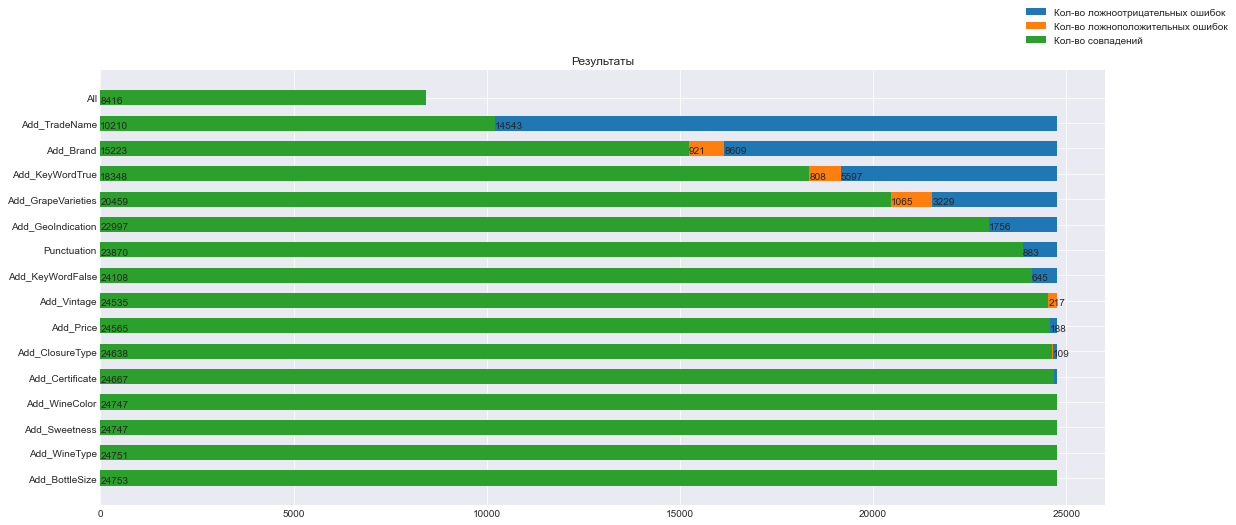

In [12]:
%%time
log_mlflow_on_train(
    run_params=run_params,
    model=model,
    y_true=y_val,
    y_pred=y_pred,
    test_eval=test_eval
)